### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

### Loading stock data from yahoo

In [2]:
tech_company = ["AAPL", "GOOG", "MSFT", "AMZN"]

# Setting start and end time for getting data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_company:
    globals()[stock] = yf.download(stock, start, end)

company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company name to each DataFrame
for stock, com_name in zip(tech_company, company_name):
    globals()[stock]['company_name'] = com_name

# Concatenate all DataFrames into one
df = pd.concat([globals()[stock] for stock in tech_company], axis=0)
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-12,181.270004,183.889999,180.970001,183.789993,182.819077,54274900,APPLE
2023-06-13,182.800003,184.149994,182.440002,183.309998,182.341629,54929100,APPLE
2023-06-14,183.369995,184.389999,182.020004,183.949997,182.978256,57462900,APPLE
2023-06-15,183.960007,186.520004,183.779999,186.009995,185.027359,65433200,APPLE
2023-06-16,186.729996,186.990005,184.270004,184.919998,183.943115,101235600,APPLE


### Descriptive Analysis about the Loaded Data

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,212.539426,214.437007,210.658615,212.650794,212.112897,3.794993e+07
std,96.525459,97.135948,95.713938,96.492458,96.015615,2.143212e+07
min,116.760002,118.224998,115.830002,116.870003,116.737160,8.828600e+06
25%,140.860001,142.950001,139.827496,141.267498,141.202351,2.067172e+07
50%,176.464996,177.980003,174.459999,176.355003,175.887207,3.337510e+07
75%,226.262501,233.945000,225.112503,233.397499,232.955727,5.029382e+07
max,432.970001,433.600006,427.160004,432.679993,432.679993,1.688747e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2023-06-12 to 2024-06-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1008 non-null   float64
 1   High          1008 non-null   float64
 2   Low           1008 non-null   float64
 3   Close         1008 non-null   float64
 4   Adj Close     1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   company_name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


In [5]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

### Checking out Closing Price

The last price at which the stock is exchanged on a typical trading day is known as the closing price. Investors typically use a stock's closing price as a common benchmark to monitor its performance over time.

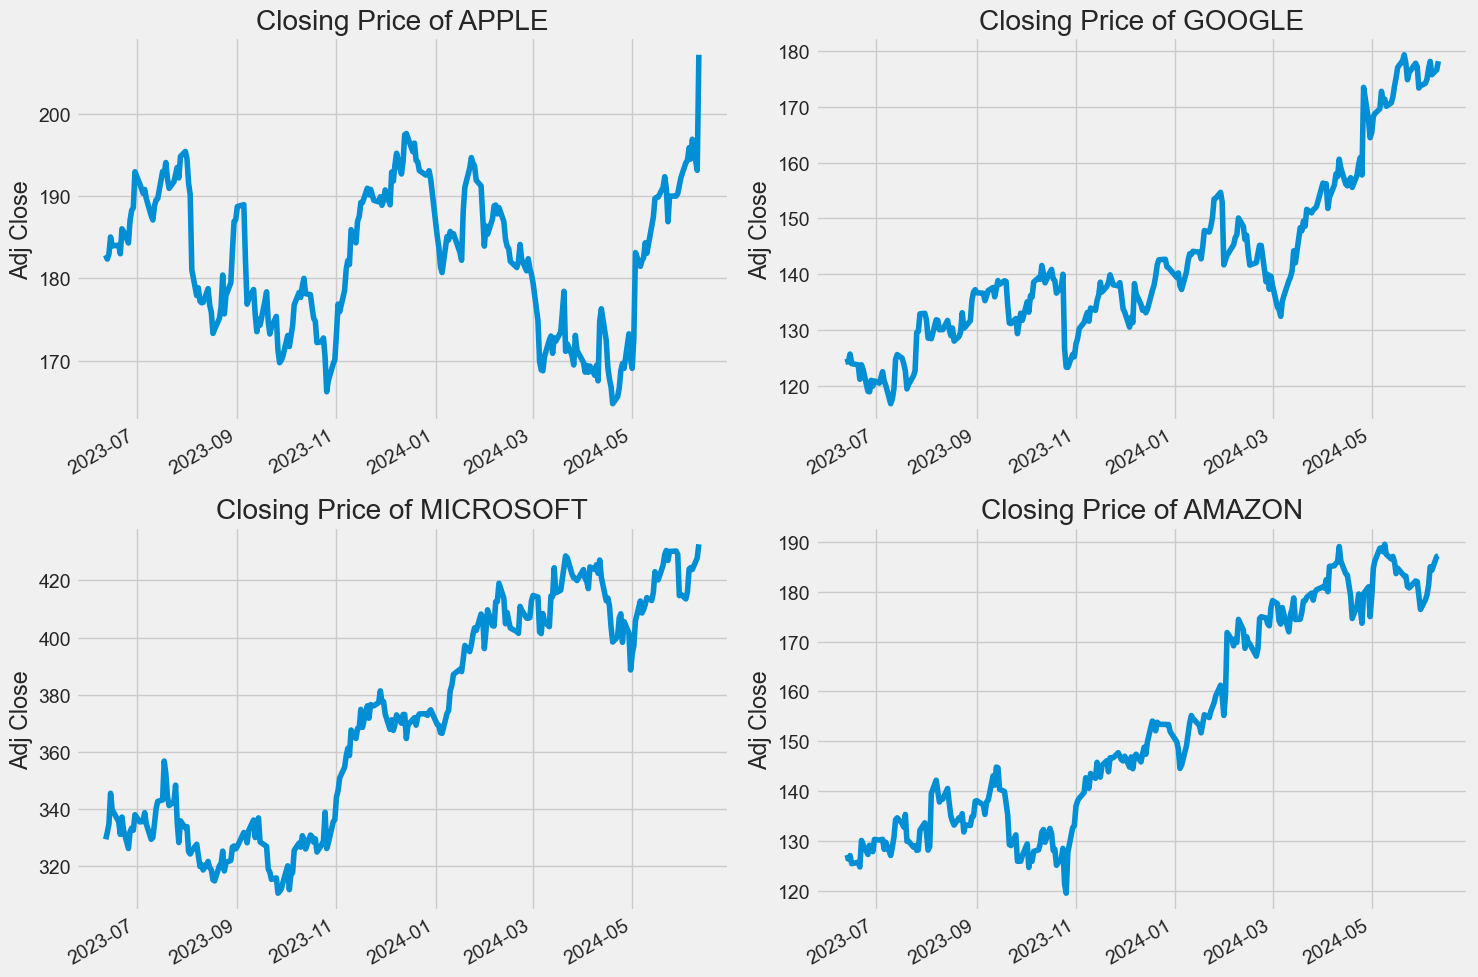

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

for i, (stock, com_name) in enumerate(zip(tech_company, company_name), 1):
    plt.subplot(2, 2, i)
    company_data = df[df["company_name"] == com_name]
    company_data["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()
plt.show()

### Checking out Volume of Sales
Volume is the total quantity of a security or asset that is traded over time, usually in a single day. For example, the number of shares of a securities that are traded between its daily open and close is referred to as the stock trading volume. For technical traders, trading volume and variations in volume over time are crucial inputs.

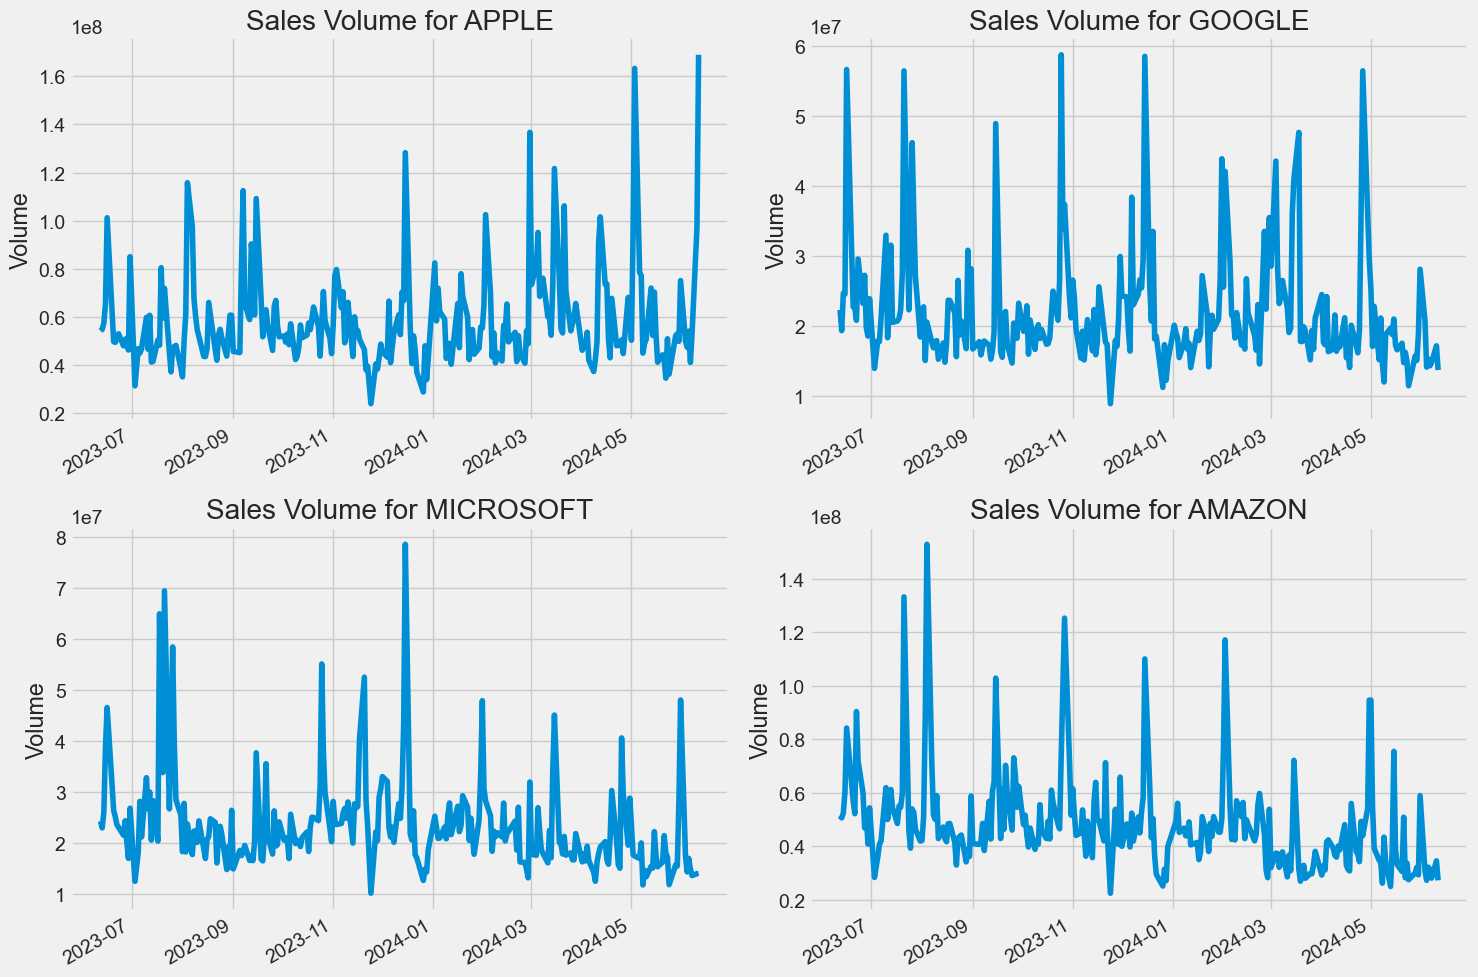

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

for i, (stock, com_name) in enumerate(zip(tech_company, company_name), 1):
    plt.subplot(2, 2, i)
    company_data = df[df["company_name"] == com_name]
    company_data["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()
plt.show()

### Checking the Moving Average(MA)
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses

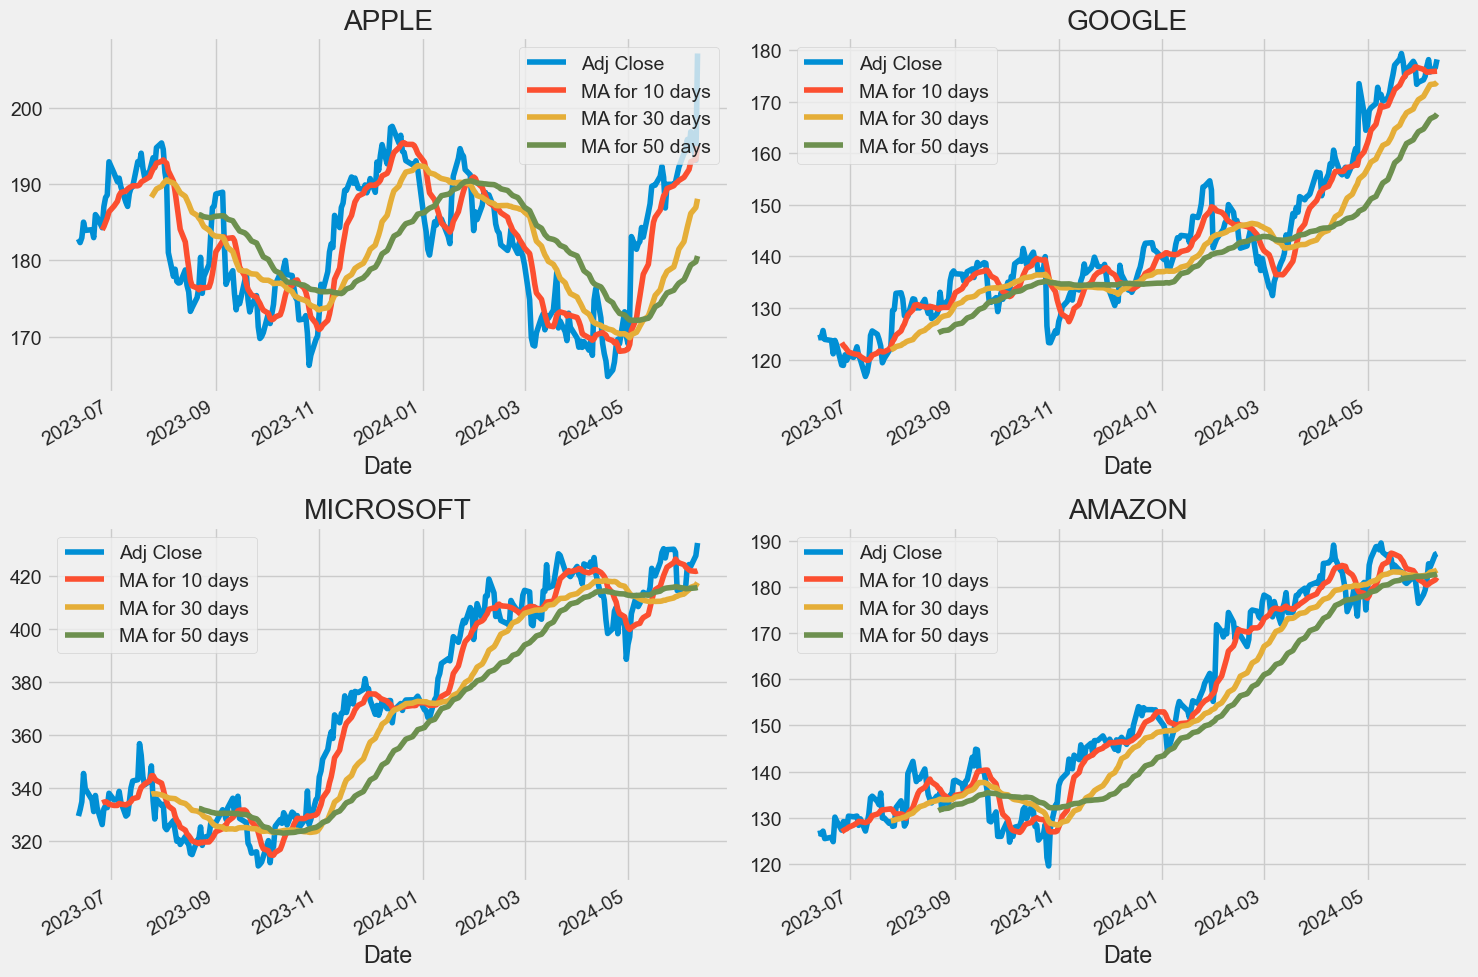

In [8]:
# Calculating moving averages
ma_day = [10, 30, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df.groupby("company_name")["Adj Close"].transform(lambda x: x.rolling(ma).mean())

# Plotting the graph
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, com_name in zip(axes.flatten(), company_name):
    company_data = df[df["company_name"] == com_name]
    company_data[["Adj Close", f"MA for {ma_day[0]} days", f"MA for {ma_day[1]} days", f"MA for {ma_day[2]} days"]].plot(ax=ax)
    ax.set_title(com_name)

fig.tight_layout()
plt.show()

### Checking the daily return of the stock on average

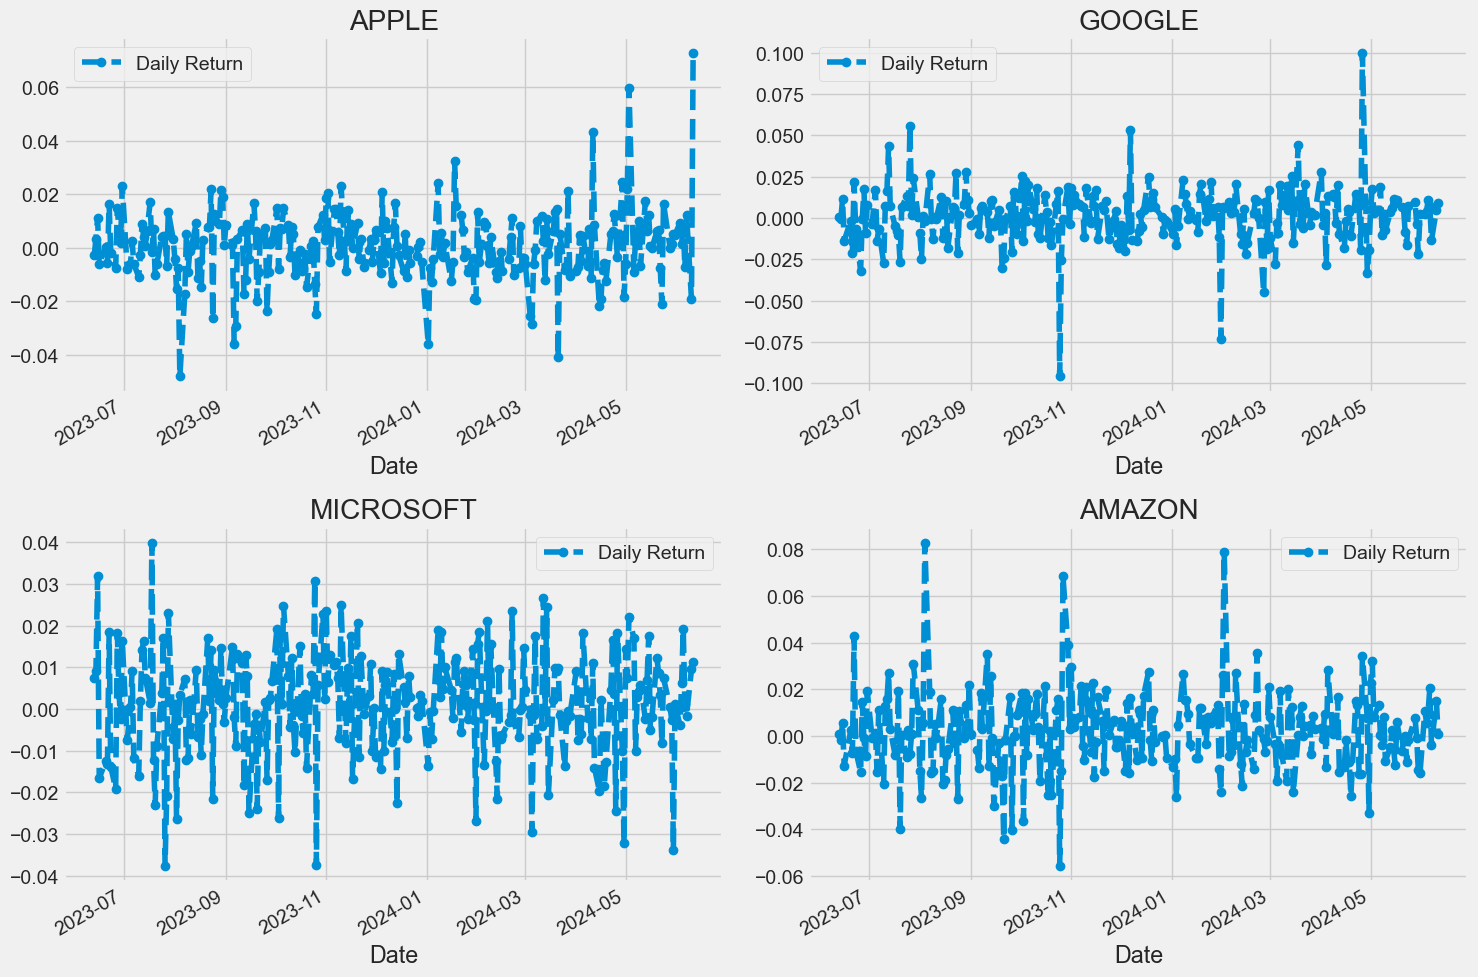

In [9]:
# Calculating daily returns
df["Daily Return"] = df.groupby("company_name")["Adj Close"].pct_change()

# Plotting the graph
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, com_name in zip(axes.flatten(), company_name):
    company_data = df[df["company_name"] == com_name]
    company_data['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(com_name)

fig.tight_layout()
plt.show()

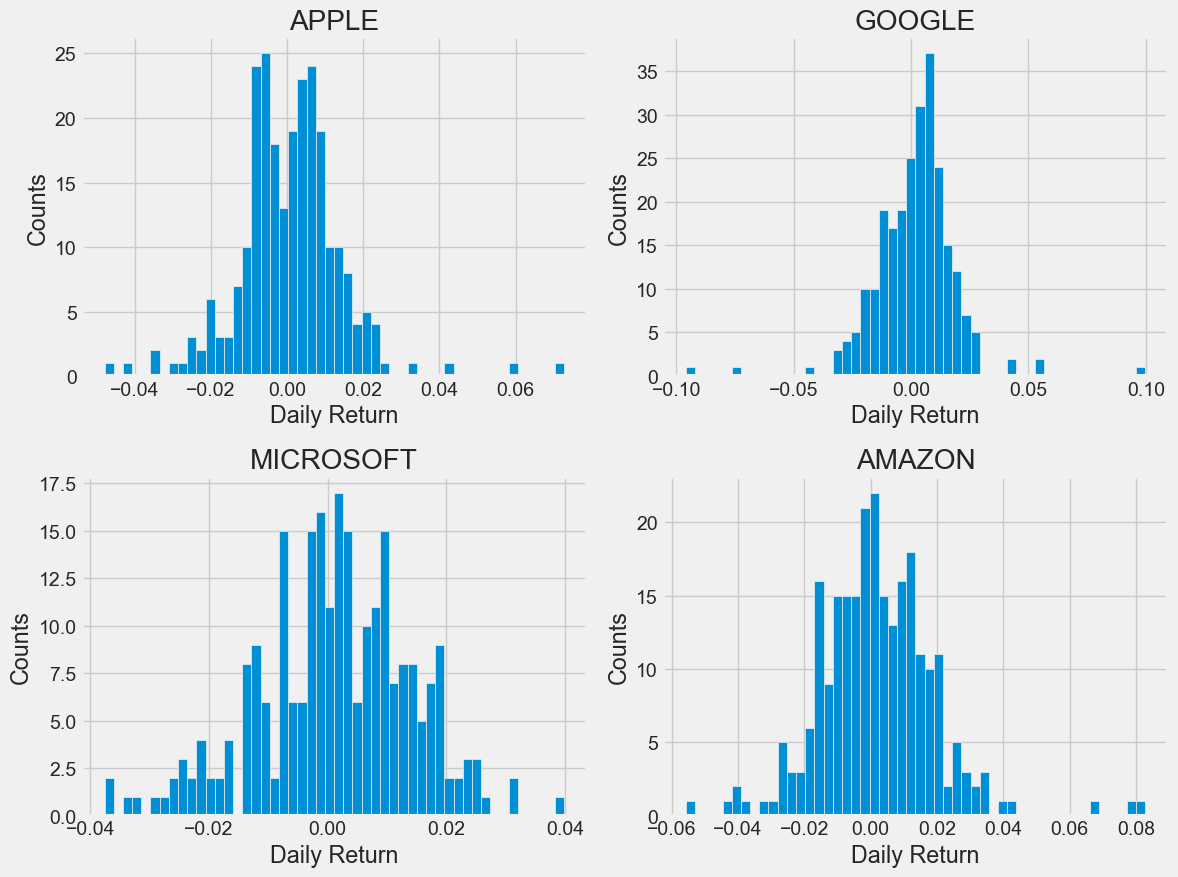

In [10]:
# Plotting the graph
plt.figure(figsize=(12, 9))

for i, com_name in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    company_data = df[df['company_name'] == com_name]
    company_data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{com_name}')
    
plt.tight_layout()
plt.show()

### The correlation between different stocks closing prices

In [11]:
# Downloading stock data for all companies in one go
closing_df = yf.download(tech_company, start=start, end=end)['Adj Close']

# Making a new tech returns DataFrame
tech_returns = closing_df.pct_change()
tech_returns = tech_returns.replace([np.inf, -np.inf], np.nan)
tech_returns = tech_returns.dropna()
tech_returns = tech_returns.rename(columns={
    "AAPL": "APPLE",
    "AMZN": "AMAZON",
    "GOOG": "GOOGLE",
    "MSFT": "MICROSOFT"
})
tech_returns.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,APPLE,AMAZON,GOOGLE,MICROSOFT
Date,,,,
2023-06-13,-0.002612,0.000711,0.000643,0.007353
2023-06-14,0.003491,-0.001895,-0.000402,0.009124
2023-06-15,0.011199,0.005458,0.011336,0.031897
2023-06-16,-0.005860,-0.012745,-0.013753,-0.016576
2023-06-20,0.000487,0.002311,-0.001693,-0.012502


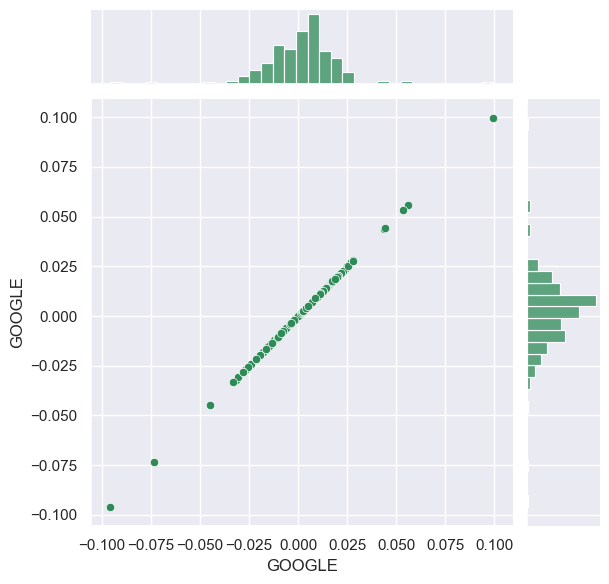

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.set_theme(rc={'figure.figsize':(8,6)})
sns.jointplot(x='GOOGLE', y='GOOGLE', data=tech_returns, kind='scatter', color='seagreen')
plt.show()

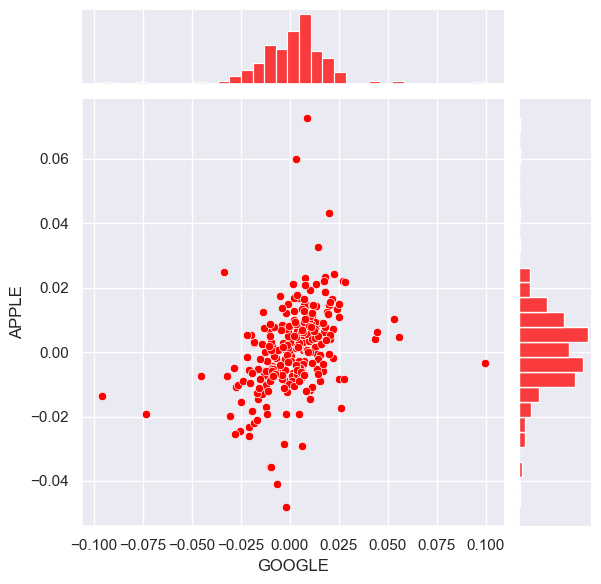

In [13]:
# Using joinplot to compare the daily returns of Google and Apple
sns.jointplot(x="GOOGLE", y="APPLE", data=tech_returns, kind="scatter", color="red")
plt.show()

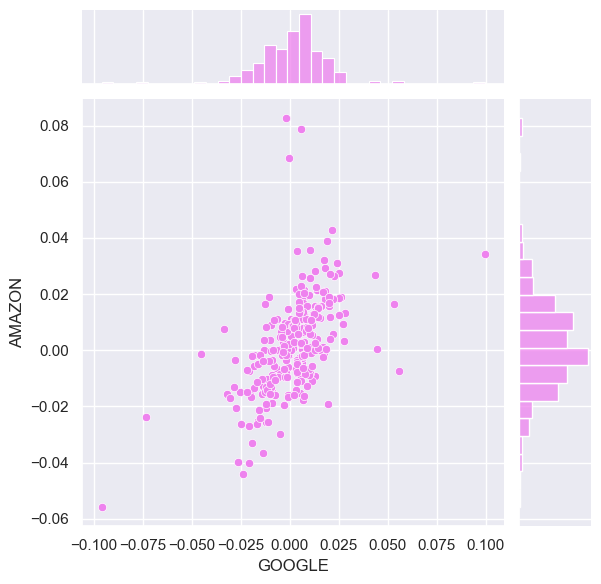

In [14]:
# Using joinplot to compare the daily returns of Google and Amazon
sns.jointplot(x="GOOGLE", y="AMAZON", data=tech_returns, kind="scatter", color="violet")
plt.show()

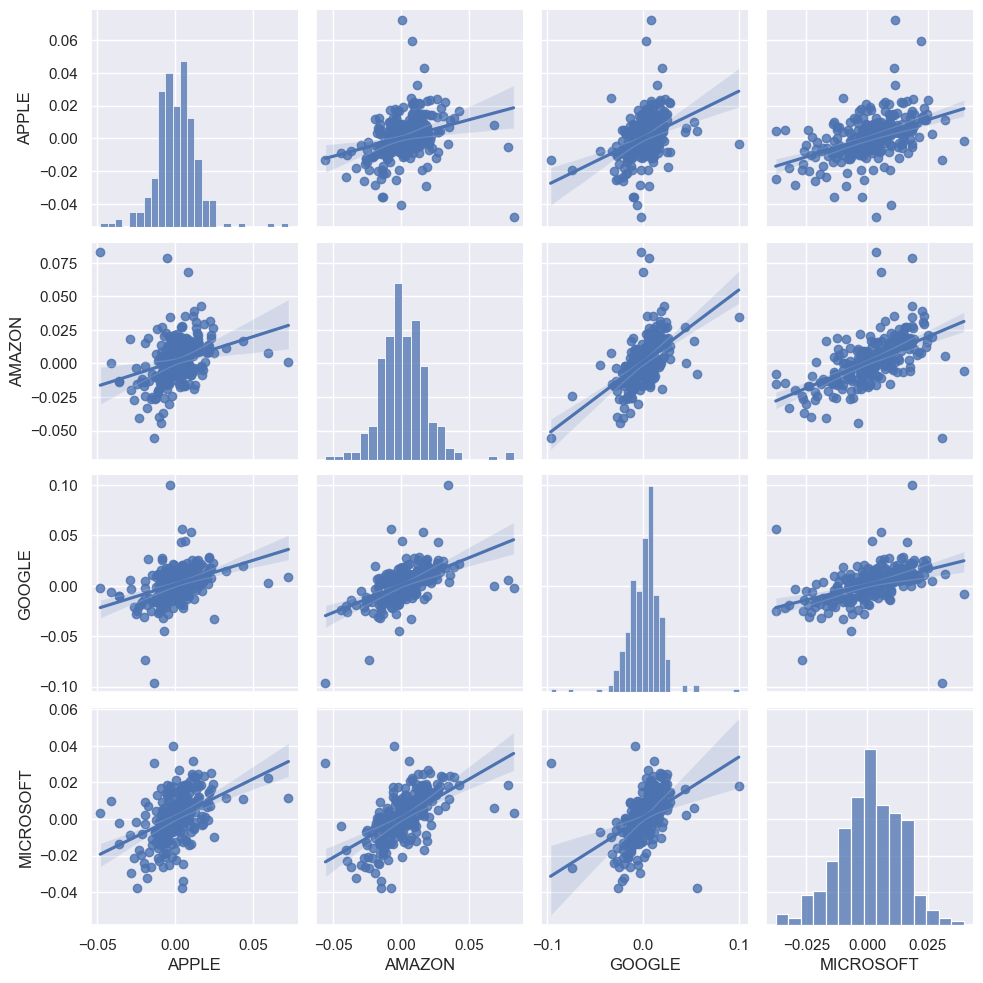

In [15]:
sns.pairplot(tech_returns, kind='reg')
plt.show()

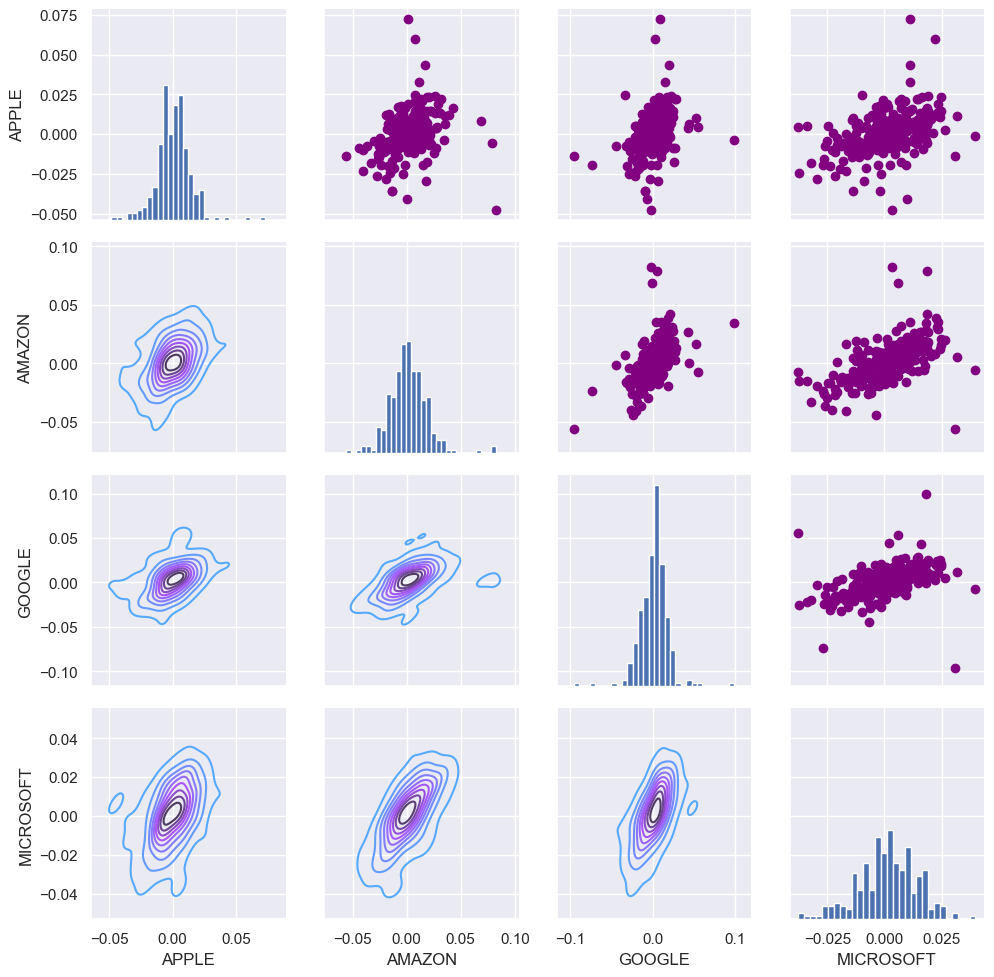

In [16]:
# Setting up the figure by naming "returns_fig" and calling PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_returns)
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)
plt.show()

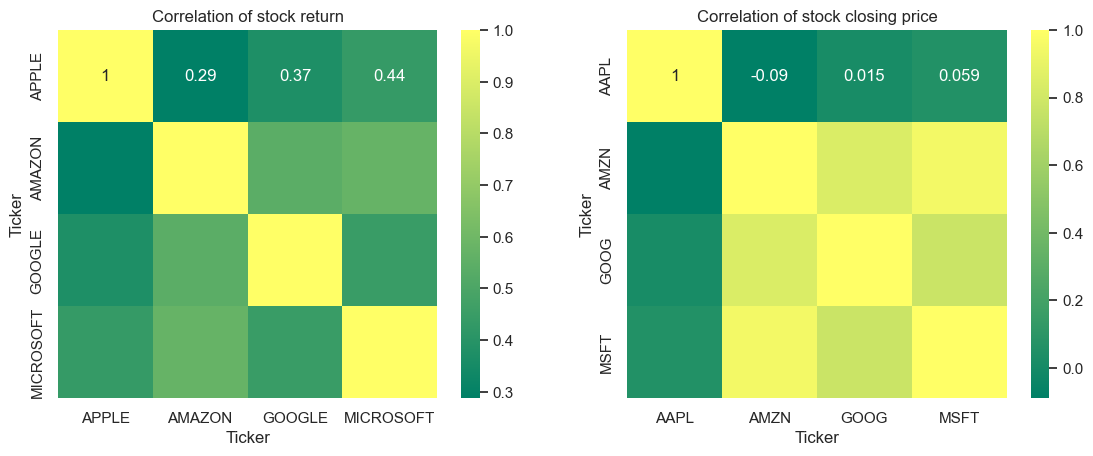

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
plt.show()

### Finding out the risk factor by investing in a particular stock

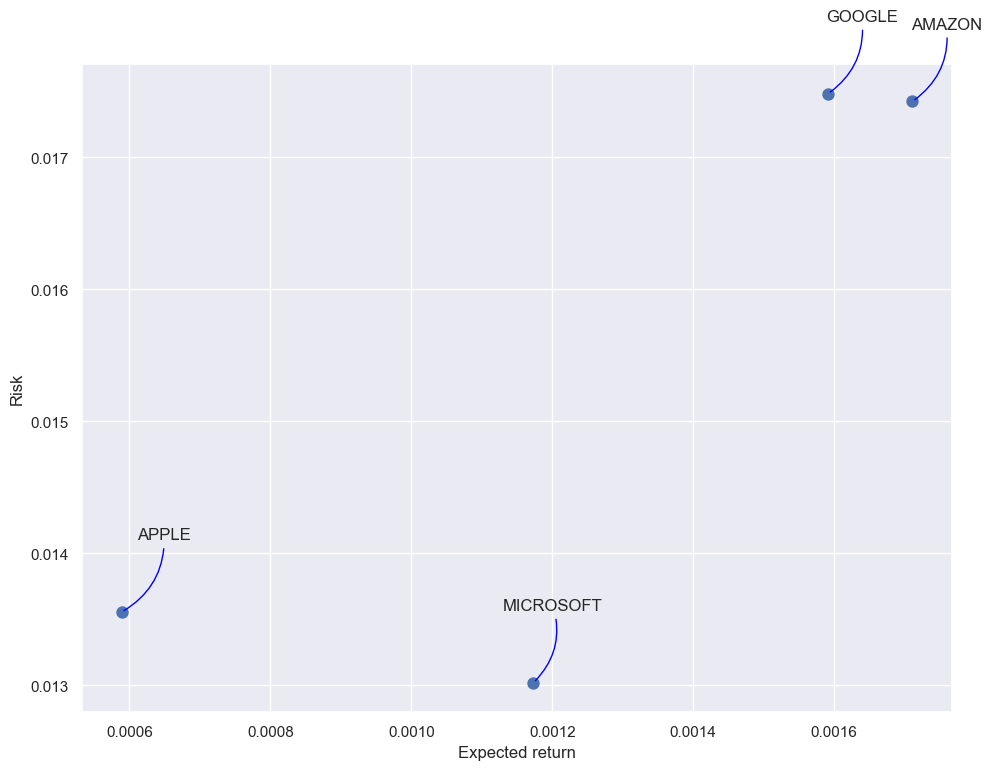

In [18]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(tech_returns.mean(), tech_returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(tech_returns.columns, tech_returns.mean(), tech_returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.show()

### Predicting the closing price stock price of MICROSOFT

In [19]:
df = yf.download("AAPL", start="2010-01-01", end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461975,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


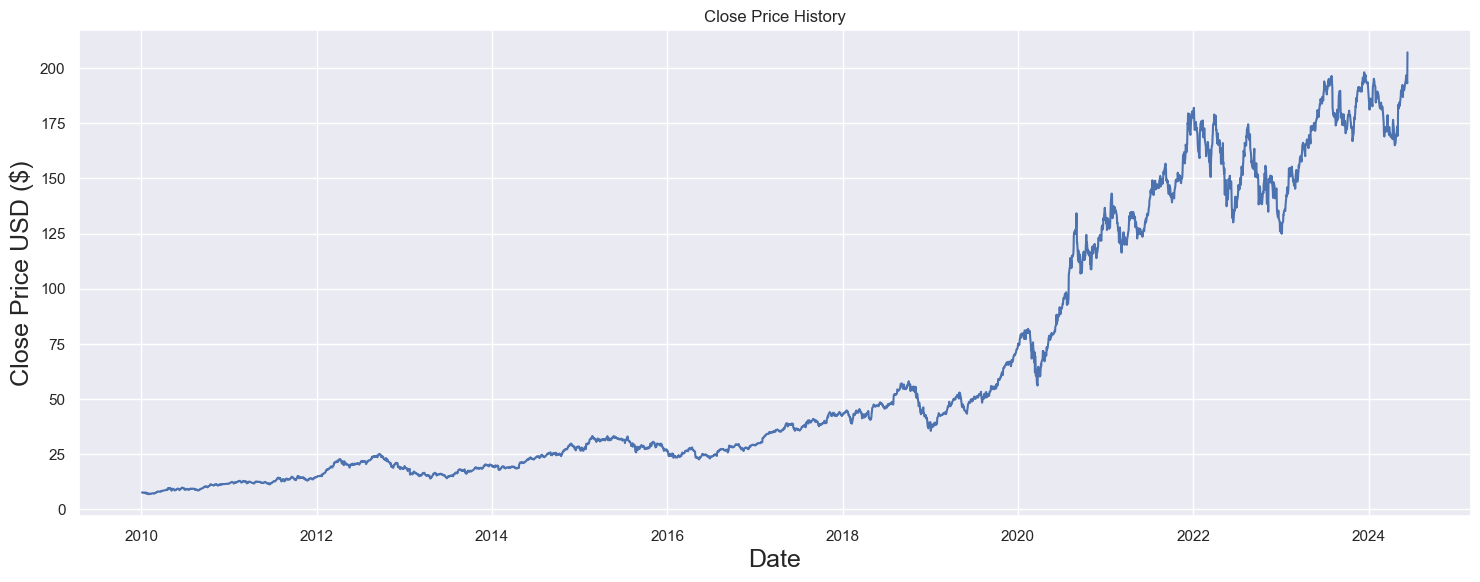

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Creating a new dataframe with only the 'Close column'
data = df.filter(["Close"])
# Converting the dataframe to a numpy array
dataset = data.values
# Getting the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 0.95))
training_data_len

3453

In [22]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00391573],
       [0.0039817 ],
       [0.00337366],
       ...,
       [0.94877458],
       [0.92995195],
       [1.        ]])

In [23]:
# Creating training dataset
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
# Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


[array([3.91572669e-03, 3.98170362e-03, 3.37366031e-03, 3.30411469e-03,
       3.55375234e-03, 3.22031331e-03, 2.79414281e-03, 3.31659681e-03,
       3.09905842e-03, 2.47496668e-03, 4.09938742e-03, 3.50917810e-03,
       2.85655103e-03, 1.01637506e-03, 1.96499480e-03, 2.47674984e-03,
       2.82267575e-03, 1.29097457e-03, 1.78077936e-06, 4.77872618e-04,
       6.79364946e-04, 1.28027561e-03, 0.00000000e+00, 6.08038542e-04,
       3.69102233e-04, 7.38209228e-04, 5.47413480e-04, 1.18042103e-03,
       1.48533664e-03, 2.02383908e-03, 1.87227523e-03, 1.94003056e-03,
       1.71535715e-03, 1.49246690e-03, 8.93339394e-04, 1.53526512e-03,
       1.77420143e-03, 2.24137747e-03, 3.02060414e-03, 2.99563990e-03,
       3.08122444e-03, 3.32729577e-03, 4.79658873e-03, 4.81976981e-03,
       5.52231822e-03, 5.84684383e-03, 5.96452763e-03, 6.16067524e-03,
       5.66853496e-03, 5.77730297e-03, 5.71846106e-03, 5.81296617e-03,
       5.38501727e-03, 5.83079777e-03, 6.47450189e-03, 6.65459868e-03,
     

(3393, 60, 1)

from keras import layers, models, datasets, utils

In [24]:
from keras import layers, Sequential

model = Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0215
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.6930e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.5864e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.2810e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.4491e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7496e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3689e-04
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.2442e-04
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.7346e-04
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.0433e-04
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9694e-04
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.8141e-04
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.9235e-04
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.8447e-04
Epoch 15/100
54/5

In [25]:
# Creating the testing data set 
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converting the data to a numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the model to predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


2.5985079840207397

C:\Users\nehal\AppData\Local\Temp\ipykernel_20712\3478973043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


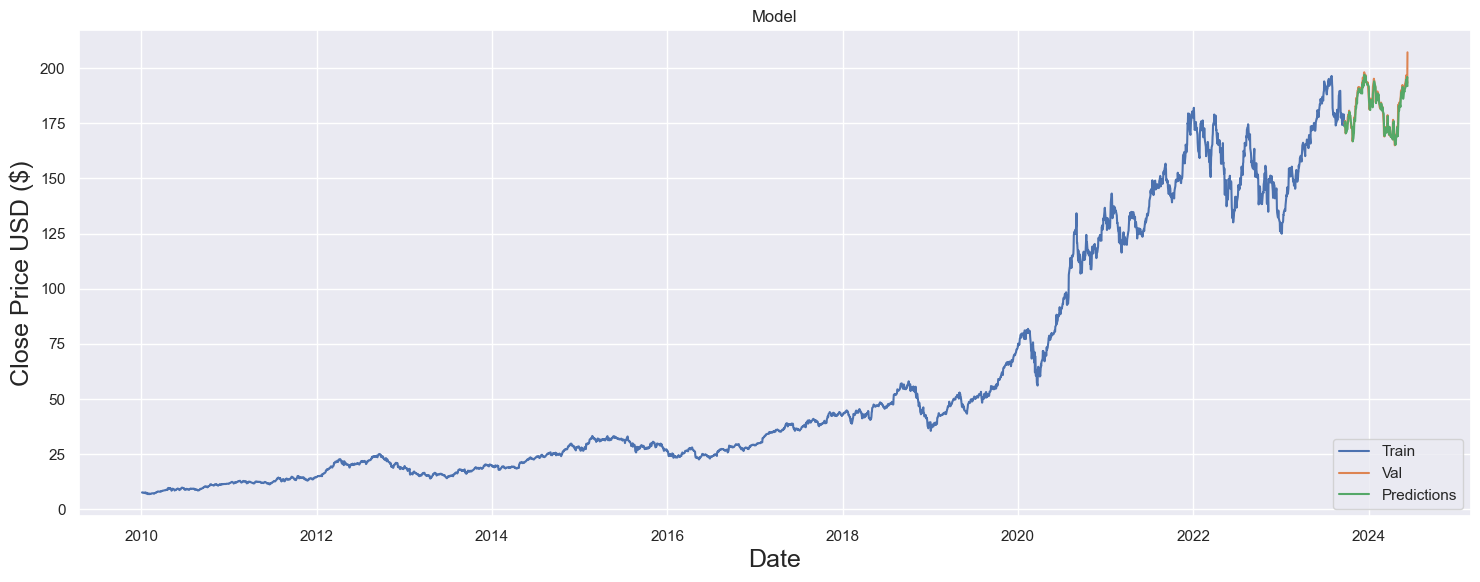

In [26]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# Visualizing the data
plt.figure(figsize=(16,6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [27]:
valid

,Close,Predictions
Date,,
2023-09-22,174.789993,173.596542
2023-09-25,176.080002,174.552673
2023-09-26,171.960007,175.793762
2023-09-27,170.429993,171.605286
2023-09-28,170.690002,170.424362
...,...,...
2024-06-05,195.869995,193.189682
2024-06-06,194.479996,194.790344
2024-06-07,196.889999,193.264557
